In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Another version using diabetes SKLearn dataset and Linear_resression class
# Targets are differebt in this version
from sklearn import datasets

In [75]:
# Load the diabetes dataset
dataset = sklearn.datasets.load_diabetes()
diabetes = pd.DataFrame(dataset.data, columns=dataset.feature_names) 
diabetes['target'] = pd.Series(dataset.target)

# Clean diabetes dataset
diabetes.drop(['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',], inplace=True, axis=1)
diabetes.head()

,bmi,target
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In [76]:
# Linear Regression class
class Linear_Regression:
    def __init__(self):
        self.x = None
        self.y = None
        self.alpha0 = None
        self.alpha1 = None
        self.coeffients = []
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        
        xmean = x.mean()
        ymean = y.mean()
        
        sum0, sum1 = 0, 0
        for i in range(len(x)):
            sum0 += (x[i] - xmean) * (y[i] - ymean)
            sum1 += (x[i] - xmean) ** 2
        
        # alpha1 is m and alpha0 is b
        self.alpha1 = float(sum0 / sum1) 
        self.alpha0 = ymean - float(self.alpha1 * xmean)
        
        self.coeffients = [self.alpha0, self.alpha1]
        return self
    
    def predict(self, x):
        # m * x + b
        return self.coeffients[1] * x + self.coeffients[0]
    
    def mse(self, ytest, ypred):
        ysum = 0
        for i in range(len(ytest)):
            ysum += (ypred[i] - ytest[i]) ** 2
        
        return float(ysum / len(ytest))

In [77]:
# Split diabetes dataset
X = diabetes['bmi'].values.reshape(-1, 1)
y = diabetes['target'].values.reshape(-1, 1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Use diabetes dataset to create sample Linear regression
LR = Linear_Regression()
LR.fit(Xtrain, ytrain)
y_pred = LR.predict(Xtest)

print("MSE: ", LR.mse(y_test, y_pred))

MSE:  4150.680189329982


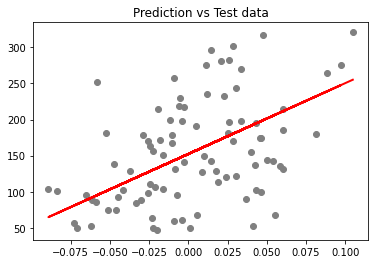

In [78]:
# Plot data and the line
plt.scatter(Xtest, ytest, color = "grey")
plt.plot(Xtest, y_pred, color = "red", linewidth=2)

plt.title("Prediction vs Test data")

plt.show()